In [1]:
import tensorflow 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy

In [3]:
tensorflow.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tensorflow.test.is_built_with_cuda()

False

In [7]:
(x_train,y_train),(x_test,y_test) =tensorflow.keras.datasets.cifar10.load_data()

In [8]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [10]:
## data shape 

x_train[0][1]

array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33],
       [112,  72,  37],
       [119,  79,  44],
       [109,  71,  33],
       [105,  69,  27],
       [125,  89,  46],
       [127,  92,  46],
       [122,  85,  39],
       [131,  89,  47],
       [124,  82,  41],
       [121,  79,  37],
       [131,  89,  48],
       [132,  91,  53],
       [133,  94,  58],
       [133,  96,  60],
       [123,  88,  55],
       [119,  83,  50],
       [122,  87,  57]], dtype=uint8)

In [18]:
# plot images in the data

def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

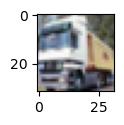

In [20]:
plot_sample(1)

In [22]:
### image name
classes = ['airplane',"automobile","bird","cat","deer","dog","forg","horse","ship","truck"]

In [23]:
y_train.shape

(50000, 1)

In [24]:
# here y train and y test is not in image form, its in the name form so we have to create the image classification list

classes[y_train[3][0]]

'deer'

In [41]:
## difference

print(x_train[0])

print("---------------------")

print(x_train_scaled)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
---------------------
[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.       

In [54]:
## for train write the code to call keras
##This package provides utilities for Keras, such as modified callbacks, genereators, etc.

import pandas as pd
y_train_categorical = keras.utils.to_categorical(
y_train, num_classes =10)  ### num classes =10 because we have 10 classified images

In [56]:
##actual
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [57]:
## its just like one hot code
##after converting to categorical
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [58]:
## now again we apply code to convert categaorical for y_test

y_test_categorical= keras.utils.to_categorical(y_test,num_classes=10)

In [63]:
## details for creating the neural layers for model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation= "sigmoid")
])

C:\Users\chand\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
## here type of mathematical model, type of loss, type of accuracy test should be given
model.compile(optimizer = 'SGD',
             loss ="categorical_crossentropy",
             metrics=['accuracy'])

In [66]:
model.fit(x_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.2965 - loss: 1.9628
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4059 - loss: 1.6906
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4388 - loss: 1.6043
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4573 - loss: 1.5527
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4705 - loss: 1.5062


In [70]:
x_test_scaled= x_test/255

In [71]:
## now predict the x_test

model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.28514627, 0.5770063 , 0.7405616 , ..., 0.07660767, 0.5902957 ,
        0.06366557],
       [0.7062469 , 0.96700966, 0.28544375, ..., 0.08002418, 0.9632009 ,
        0.9763346 ],
       [0.90980905, 0.9436955 , 0.4518427 , ..., 0.13621533, 0.97168857,
        0.9018737 ],
       ...,
       [0.06287418, 0.05019955, 0.7962993 , ..., 0.55091786, 0.32766435,
        0.11701901],
       [0.22879761, 0.2925784 , 0.7852238 , ..., 0.41520384, 0.10837861,
        0.16861144],
       [0.47660434, 0.18772714, 0.777451  , ..., 0.817351  , 0.26877567,
        0.23347282]], dtype=float32)

In [72]:
## predict one image from x_test
model.predict(x_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([0.28514627, 0.5770063 , 0.7405616 , 0.89227015, 0.39120877,
       0.7790254 , 0.89022267, 0.07660767, 0.5902957 , 0.06366557],
      dtype=float32)

In [74]:
## for knowing the image classsification from scaled to normal image classification with number we apply the below code

numpy.argmax(model.predict(x_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


3

In [75]:
## again we want the image name use below code

classes[numpy.argmax(model.predict(x_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


'cat'